In [36]:
import os
import numpy as np
import torch
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
import torchvision
os.environ["CUDA_VISIBLE_DEVICES"]="1"

from torchsummary import summary
from PIL import Image
from urllib.request import urlopen
import requests

from torchvision import transforms
from torchvision.utils import draw_bounding_boxes


In [46]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [38]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    plt.show()

In [2]:
model=torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /home/matteo/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

In [15]:
url="https://www.getyourguide.it/magazine/wp-content/migrated-content/uploads/2018/08/Colosseum-GetYourGuide.jpg"
img=Image.open(requests.get(url, stream=True).raw)
img=transforms.ToTensor()(img)

In [20]:
model.eval()
out=model([img])

/home/matteo/anaconda3/envs/pytorch/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180549130/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [54]:
labels=[class_names[i] for i in out[0]["labels"]]
idxs=len(out[0]["scores"][out[0]["scores"]>0.8])
idxs

7

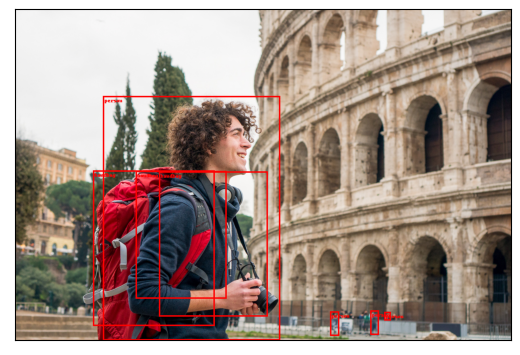

In [56]:
result = draw_bounding_boxes((img*255).type(torch.uint8), out[0]["boxes"][:idxs],labels=labels[:idxs],  colors="red",width=3,font_size=20)
show(result)

7